# EDA process

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

In [11]:
matche_df= pd.read_csv('matches.csv')
ball_df= pd.read_csv('deliveries.csv')

### Display basic info

In [14]:
print(matche_df.info())
print(ball_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           74 non-null     int64  
 1   team1            74 non-null     object 
 2   team2            74 non-null     object 
 3   date             74 non-null     object 
 4   match_number     74 non-null     int64  
 5   venue            74 non-null     object 
 6   city             74 non-null     object 
 7   toss_winner      74 non-null     object 
 8   toss_decision    74 non-null     object 
 9   player_of_match  73 non-null     object 
 10  umpire1          74 non-null     object 
 11  umpire2          74 non-null     object 
 12  reserve_umpire   74 non-null     object 
 13  match_referee    74 non-null     object 
 14  winner           74 non-null     object 
 15  winner_runs      40 non-null     float64
 16  winner_wickets   33 non-null     float64
 17  match_type       7

### Show first few rows

In [17]:
print(matche_df.head())
print(ball_df.head())

   season                 team1                        team2        date  \
0    2023   Chennai Super Kings               Gujarat Titans  2023/03/31   
1    2023          Punjab Kings        Kolkata Knight Riders  2023/04/01   
2    2023  Lucknow Super Giants               Delhi Capitals  2023/04/01   
3    2023      Rajasthan Royals          Sunrisers Hyderabad  2023/04/02   
4    2023        Mumbai Indians  Royal Challengers Bangalore  2023/04/02   

   match_number                                              venue  \
0             1                              Narendra Modi Stadium   
1             2       Punjab Cricket Association IS Bindra Stadium   
2             3  Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...   
3             4                 Rajiv Gandhi International Stadium   
4             5                              M Chinnaswamy Stadium   

         city                  toss_winner toss_decision player_of_match  \
0   Ahmedabad               Gujarat Titans    

### Data Cleaning

#### 1. Check for Missing Values

In [24]:
print(matche_df.isnull().sum())
print(ball_df.isnull().sum())

season              0
team1               0
team2               0
date                0
match_number        0
venue               0
city                0
toss_winner         0
toss_decision       0
player_of_match     1
umpire1             0
umpire2             0
reserve_umpire      0
match_referee       0
winner              0
winner_runs        34
winner_wickets     41
match_type          0
dtype: int64
match_id                      0
season                        0
start_date                    0
venue                         0
innings                       0
ball                          0
batting_team                  0
bowling_team                  0
striker                       0
non_striker                   0
bowler                        0
runs_off_bat                  0
extras                        0
wides                     17237
noballs                   17763
byes                      17818
legbyes                   17616
penalty                   17863
wicket_type    

#### 2. Handle Missing Values

##### Matches Dataset
- Missing Values:
player_of_match: 1 missing value.
winner_runs: 34 missing values.
winner_wickets: 41 missing values.
- Strategies:
player_of_match:

Since this is a categorical field with only 1 missing value, you can fill it with a placeholder like 'Unknown' or use the most frequent value.

In [35]:
matche_df['player_of_match'] = matche_df['player_of_match'].fillna('Unknown')

- winner_runs and winner_wickets:

- These fields have a moderate amount of missing values. Depending on the context :
- Fill with Mean/Median: If you assume that missing values are missing at random, filling with the mean or median might be appropriate.

In [39]:
matche_df['winner_runs'] = matche_df['winner_runs'].fillna(matche_df['winner_runs'].median())
matche_df['winner_wickets'] = matche_df['winner_wickets'].fillna(matche_df['winner_wickets'].median())

- Predict Missing Values: Use a model to predict missing values based on other features.

- Drop Rows: If the number of missing values is small compared to the dataset size, consider dropping the rows

##### Deliveries Dataset
Missing Values:
- wides: 17,237 missing values.
- noballs: 17,763 missing values.
- byes: 17,818 missing values.
- legbyes: 17,616 missing values.
- penalty: 17,863 missing values.
- wicket_type: 16,947 missing values.
- player_dismissed: 16,947 missing values.
- other_wicket_type: 17,863 missing values.
- other_player_dismissed: 17,863 missing values.
Strategies:
-wides, noballs, byes, legbyes, penalty:

- These fields represent different types of extras. They often have missing values in rows where no extras were recorded.
- Fill with 0 as these are likely to represent cases where no extras were given.

In [41]:
ball_df['wides'] = ball_df['wides'].fillna(0)
ball_df['noballs'] = ball_df['noballs'].fillna(0)
ball_df['byes'] = ball_df['byes'].fillna(0)
ball_df['legbyes'] = ball_df['legbyes'].fillna(0)
ball_df['penalty'] = ball_df['penalty'].fillna(0)

- wicket_type, player_dismissed, other_wicket_type, other_player_dismissed:

- Missing values in these fields likely mean no wicket was recorded.
- Fill with None or 'None' as these represent no event

In [43]:
ball_df['wicket_type'] = ball_df['wicket_type'].fillna('None')
ball_df['player_dismissed'] = ball_df['player_dismissed'].fillna('None')
ball_df['other_wicket_type'] = ball_df['other_wicket_type'].fillna('None')
ball_df['other_player_dismissed'] = ball_df['other_player_dismissed'].fillna('None')

#### 3. Data Types

In [54]:
print(matche_df.dtypes)
print(ball_df.dtypes)

season               int64
team1               object
team2               object
date                object
match_number         int64
venue               object
city                object
toss_winner         object
toss_decision       object
player_of_match     object
umpire1             object
umpire2             object
reserve_umpire      object
match_referee       object
winner              object
winner_runs        float64
winner_wickets     float64
match_type          object
dtype: object
match_id                    int64
season                      int64
start_date                 object
venue                      object
innings                     int64
ball                      float64
batting_team               object
bowling_team               object
striker                    object
non_striker                object
bowler                     object
runs_off_bat                int64
extras                      int64
wides                     float64
noballs                 

### Exploratory Analysis

#### 1. General Statistics

In [97]:
print(matche_df.describe(include='all'))

print(ball_df.describe(include='all'))

        season                team1           team2        date  match_number  \
count     74.0                   74              74          74     74.000000   
unique     NaN                   10              10          56           NaN   
top        NaN  Chennai Super Kings  Mumbai Indians  2023/05/14           NaN   
freq       NaN                    9              10           2           NaN   
mean    2023.0                  NaN             NaN         NaN     37.500000   
std        0.0                  NaN             NaN         NaN     21.505813   
min     2023.0                  NaN             NaN         NaN      1.000000   
25%     2023.0                  NaN             NaN         NaN     19.250000   
50%     2023.0                  NaN             NaN         NaN     37.500000   
75%     2023.0                  NaN             NaN         NaN     55.750000   
max     2023.0                  NaN             NaN         NaN     74.000000   

                        ven

#### 2. Match Analysis

- Number of Matches by Venue

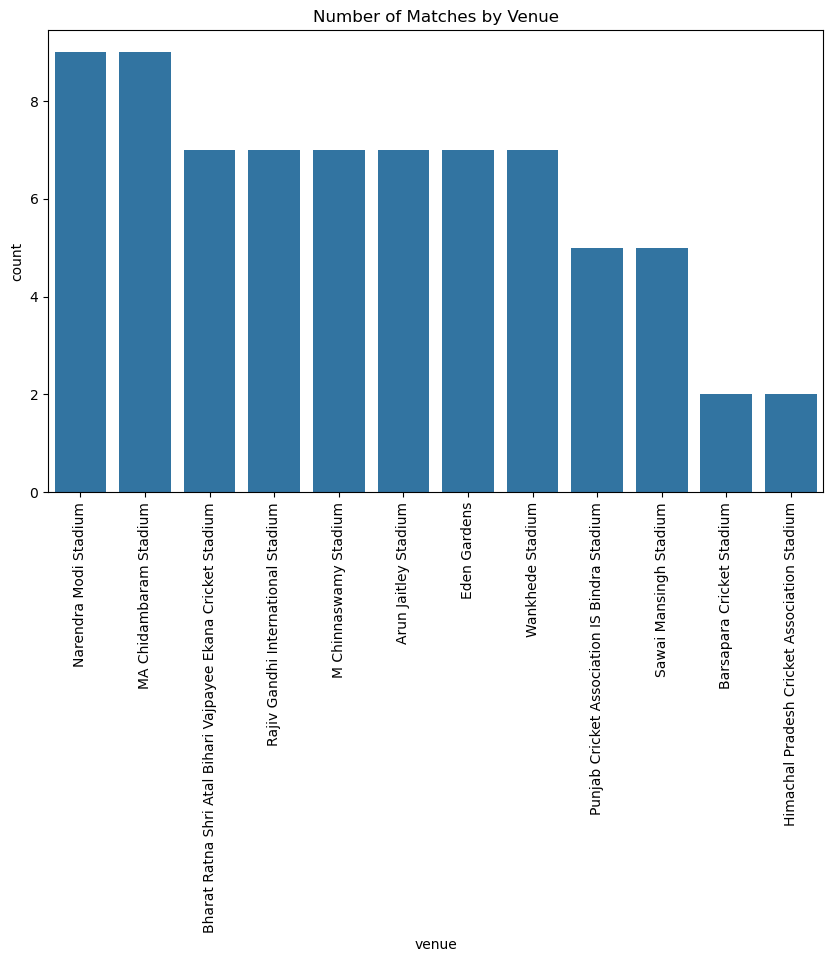

In [67]:
plt.figure(figsize=(10, 6))
sns.countplot(data=matche_df, x='venue', order=matche_df['venue'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Matches by Venue')
plt.show()

- Wins by Team

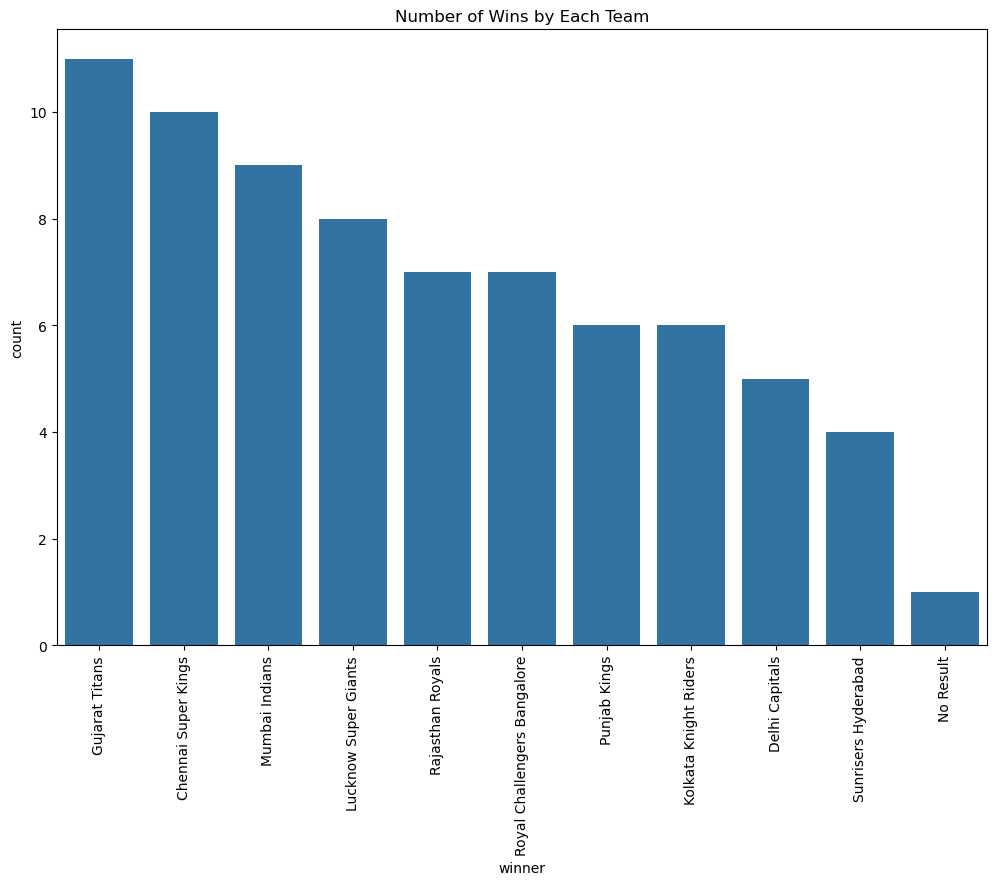

In [70]:
plt.figure(figsize=(12, 8))
sns.countplot(data=matche_df, x='winner', order=matche_df['winner'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Wins by Each Team')
plt.show()

### 3. Performance Metrics

- Top Performers (Most Runs and Most Wickets)

In [90]:
print(ball_df.columns)

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')


In [92]:
print(ball_df.head())

   match_id  season  start_date                             venue  innings  \
0   1359475    2023  2023-03-31  Narendra Modi Stadium, Ahmedabad        1   
1   1359475    2023  2023-03-31  Narendra Modi Stadium, Ahmedabad        1   
2   1359475    2023  2023-03-31  Narendra Modi Stadium, Ahmedabad        1   
3   1359475    2023  2023-03-31  Narendra Modi Stadium, Ahmedabad        1   
4   1359475    2023  2023-03-31  Narendra Modi Stadium, Ahmedabad        1   

   ball         batting_team    bowling_team     striker non_striker  ...  \
0   0.1  Chennai Super Kings  Gujarat Titans   DP Conway  RD Gaikwad  ...   
1   0.2  Chennai Super Kings  Gujarat Titans   DP Conway  RD Gaikwad  ...   
2   0.3  Chennai Super Kings  Gujarat Titans  RD Gaikwad   DP Conway  ...   
3   0.4  Chennai Super Kings  Gujarat Titans  RD Gaikwad   DP Conway  ...   
4   0.5  Chennai Super Kings  Gujarat Titans   DP Conway  RD Gaikwad  ...   

  extras  wides  noballs  byes  legbyes  penalty  wicket_type  \
0  

In [94]:
top_scorers = ball_df.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False)
print(top_scorers.head(10))

top_bowlers = ball_df[ball_df['wicket_type'].notnull()].groupby('bowler')['wicket_type'].count().sort_values(ascending=False)
print(top_bowlers.head(10))

striker
Shubman Gill    890
F du Plessis    730
DP Conway       672
V Kohli         639
YBK Jaiswal     625
SA Yadav        605
RD Gaikwad      590
DA Warner       516
RK Singh        474
Ishan Kishan    454
Name: runs_off_bat, dtype: int64
bowler
Rashid Khan       407
Mohammed Shami    403
PP Chawla         371
TU Deshpande      368
RA Jadeja         348
Mohammed Siraj    329
YS Chahal         326
Arshdeep Singh    324
CV Varun          323
B Kumar           319
Name: wicket_type, dtype: int64


#### Run Scoring Patterns

In [114]:
# Aggregate total runs scored per over
ball_df['total_runs'] = ball_df[['runs_off_bat', 'extras']].sum(axis=1)
runs_per_over = ball_df.groupby('ball')['total_runs'].sum().reset_index()

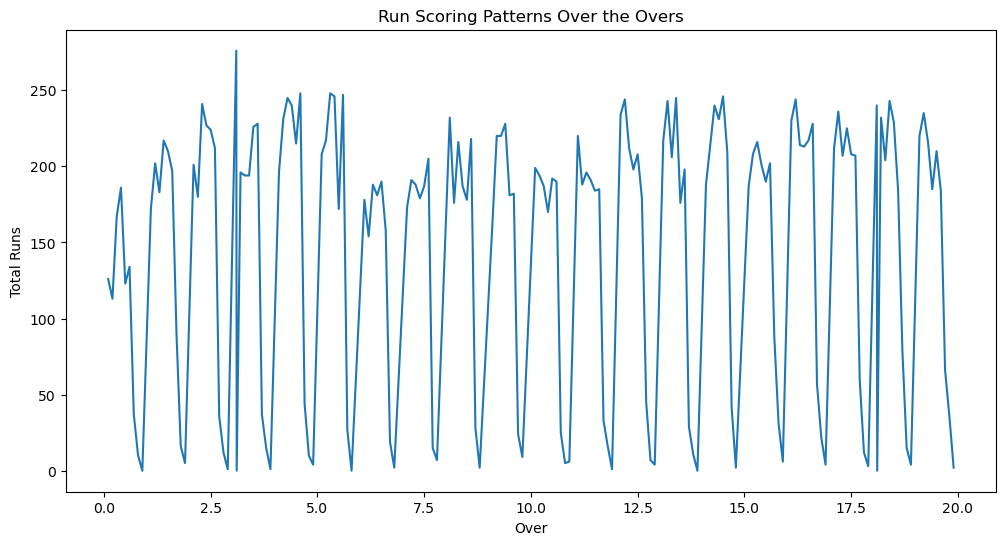

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=runs_per_over, x='ball', y='total_runs', errorbar=None)
plt.title('Run Scoring Patterns Over the Overs')
plt.xlabel('Over')
plt.ylabel('Total Runs')
plt.show()


#### Match Outcomes

Win Percentage by Team

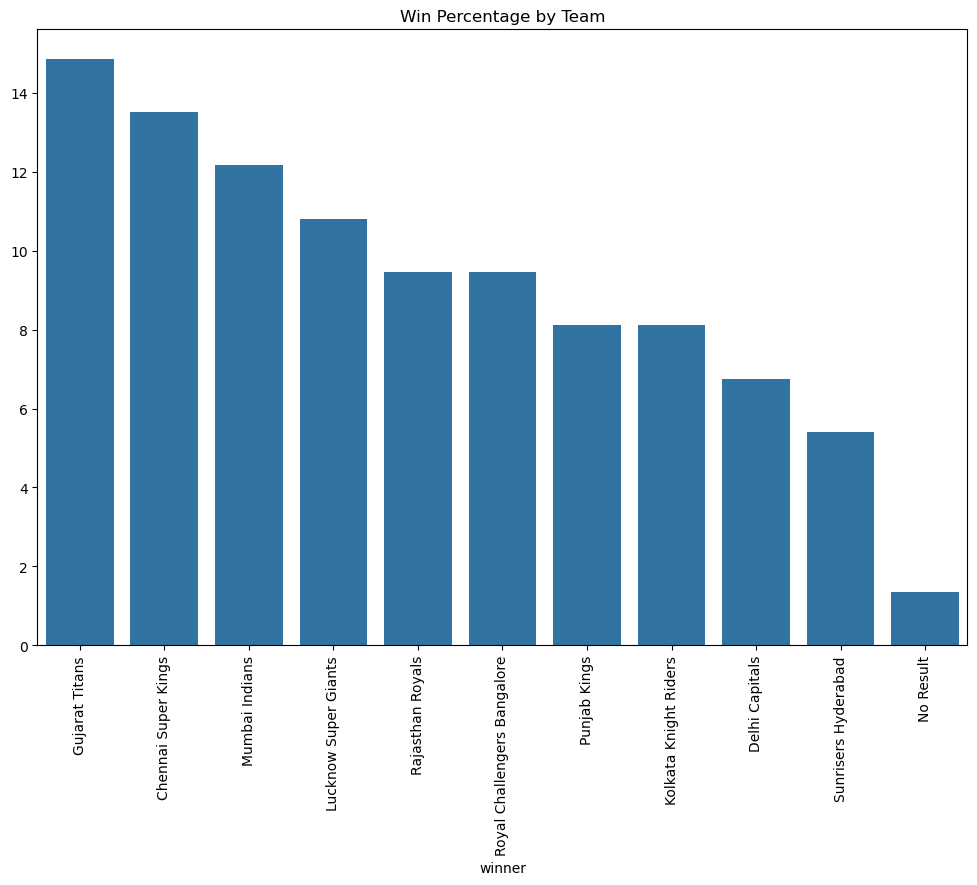

In [122]:
win_counts = matche_df['winner'].value_counts()
total_matches = len(matche_df)
win_percentage = (win_counts / total_matches) * 100

plt.figure(figsize=(12, 8))
sns.barplot(x=win_percentage.index, y=win_percentage.values)
plt.xticks(rotation=90)
plt.title('Win Percentage by Team')
plt.show()

#### Additional Insights

 Matches Won by Chasing or Setting a Target

In [128]:
print(matche_df.columns)

Index(['season', 'team1', 'team2', 'date', 'match_number', 'venue', 'city',
       'toss_winner', 'toss_decision', 'player_of_match', 'umpire1', 'umpire2',
       'reserve_umpire', 'match_referee', 'winner', 'winner_runs',
       'winner_wickets', 'match_type'],
      dtype='object')


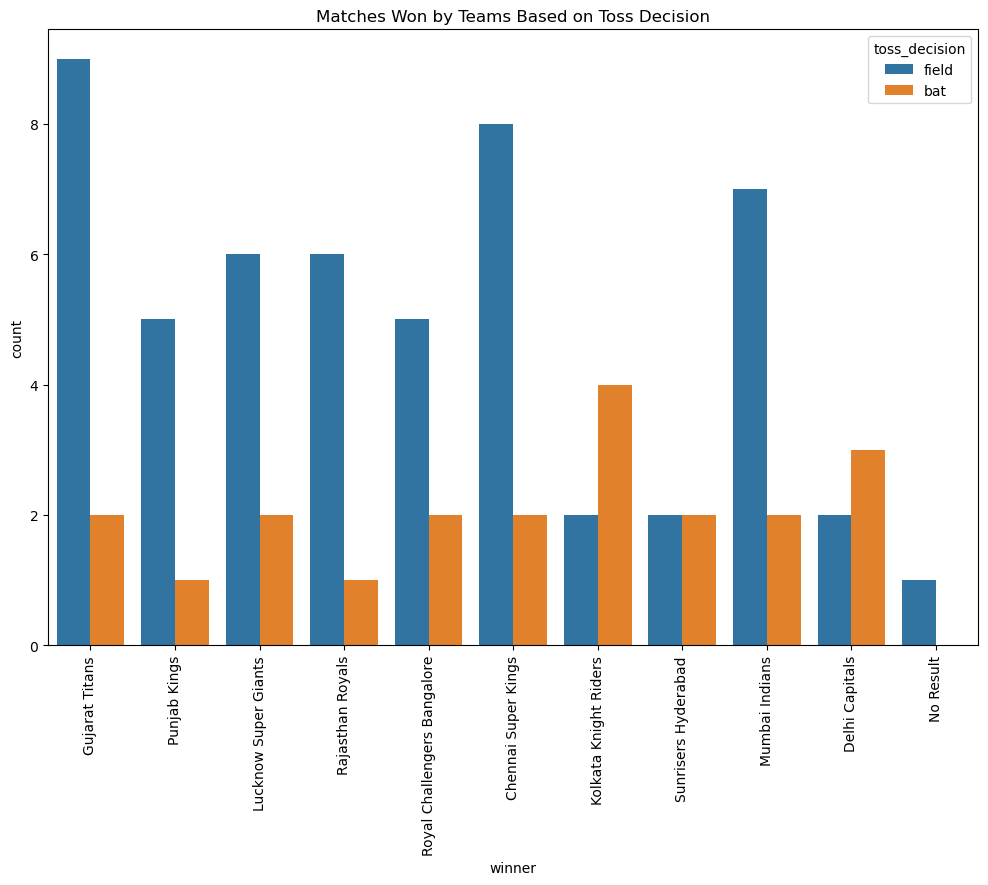

In [132]:
plt.figure(figsize=(12, 8))
sns.countplot(data=matche_df, x='winner', hue='toss_decision')
plt.title('Matches Won by Teams Based on Toss Decision')
plt.xticks(rotation=90)  # Rotate x labels if necessary for better readability
plt.show()

#### 4. Advanced Analysis (Optional)
-  Detailed Player Analysis

In [147]:
# Average runs scored by each player
player_runs = ball_df.groupby('striker')['runs_off_bat'].sum()
average_runs = player_runs.mean()
print(f"Average Runs Scored by Each Player: {average_runs:.2f}")

Average Runs Scored by Each Player: 138.01


- Partnership Analysis


Strongest Partnerships

In [157]:
partnerships = ball_df.groupby(['match_id', 'striker'])['runs_off_bat'].sum().unstack().fillna(0)
top_partnerships = partnerships.sum(axis=1).sort_values(ascending=False)
print(top_partnerships.head(10))

match_id
1359512    430.0
1359498    426.0
1359526    415.0
1359493    411.0
1359507    408.0
1359520    406.0
1359531    401.0
1359505    400.0
1359489    397.0
1359538    396.0
dtype: float64
